In [2]:
#Python
import numpy as np
import pandas as pd

#Data Science
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

#Gráficas
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
from statsmodels.tsa.stattools import adfuller

# Tarea II

- Agrupar por sector (limpiar los datos) 
- Entrenar una regresión Logística y encontrar los mejores hiperparámetros
- Probar cross-validation
- Graficar Precision-Recall curve

In [3]:
ipc_path = "ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*", "") for c in market.columns]
market_t=market.T
market_t.index
#market.head()

Index(['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC',
       'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA', 'ORBIA',
       'PE&OLES', 'GRUMAB', 'RA', 'WALMEX', 'BOLSAA', 'LIVEPOLC', 'GENTERA',
       'IENOVA', 'CUERVO', 'ELEKTRA', 'BBAJIOO', 'ALPEKA', 'MEGACPO', 'GCC',
       'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA', 'MEXBOL'],
      dtype='object')

In [4]:
bmv_emisora = "bmv_emisoras.csv" 
emisoras = pd.read_csv(bmv_emisora, index_col=0)
emisoras.index

Index(['AC', 'ACCELSA', 'ACTINVR', 'AEROMEX', 'AGRIEXP', 'AGUA', 'AHMSA',
       'ALEATIC', 'ALFA', 'ALPEK',
       ...
       'UNIFIN', 'URBI', 'VALUEGF', 'VASCONI', 'VESTA', 'VINTE', 'VISTA',
       'VITRO', 'VOLAR', 'WALMEX'],
      dtype='object', name='key', length=139)

In [5]:
data_dict = {"nombre_market":[],"nombre_emisoras":[],"ratio":[]}
for x in market_t.index:
    for y in emisoras.index:
        ratio = SequenceMatcher(None, y, x[:-1]).ratio() 
        data_dict["nombre_market"].append(x)
        data_dict["nombre_emisoras"].append(y)
        data_dict["ratio"].append(ratio)

df_ratio = pd.DataFrame(data_dict)

coin_1=df_ratio[df_ratio["ratio"] > 0.70]

In [6]:
coin_2=df_ratio[df_ratio["ratio"] > 0.80]

In [7]:
coin=pd.concat([coin_1, coin_2], ignore_index=True)
coin=coin.drop_duplicates(['nombre_market'], keep='first')

coin_sector = pd.merge(left=coin, right=emisoras, left_on='nombre_emisoras', right_on='key')

sector=coin_sector[['nombre_market','nombre_emisoras','Sector']]
sector.head()

,nombre_market,nombre_emisoras,Sector
0,KIMBERA,KIMBER,PRODUCTOS DE CONSUMO FRECUENTE
1,GAPB,GAP,INDUSTRIAL
2,CEMEXCPO,CEMEX,MATERIALES
3,ASURB,ASUR,INDUSTRIAL
4,GFNORTEO,GFNORTE,SERVICIOS FINANCIEROS


In [8]:
#Fusionamos ambas tablas
sectorf = pd.merge(left=market_t,right=sector, left_on=market_t.index, right_on='nombre_market')

sectorf.set_index(['Sector','nombre_market'],inplace=True)
sectorf.head()

,,2016-01-01 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,...,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,nombre_emisoras
Sector,nombre_market,,,,,,,,,,,,,,,,,,,,,
PRODUCTOS DE CONSUMO FRECUENTE,KIMBERA,40.37,39.16,38.89,39.13,39.16,38.65,37.85,39.08,39.95,39.54,...,38.83,38.83,39.02,38.77,38.50,37.50,37.50,38.09,38.07,KIMBER
INDUSTRIAL,GAPB,152.05,148.57,147.93,146.99,141.32,143.74,144.94,144.16,146.70,145.85,...,226.99,226.99,227.65,226.86,225.87,224.67,224.67,227.63,228.84,GAP
MATERIALES,CEMEXCPO,8.72,8.43,8.31,8.29,7.64,7.18,7.24,7.39,7.14,7.36,...,7.23,7.23,7.33,7.23,7.16,7.08,7.08,7.16,7.19,CEMEX
INDUSTRIAL,ASURB,243.89,238.29,233.03,231.97,230.71,229.76,227.83,231.81,226.71,225.29,...,353.16,353.16,357.94,356.15,354.06,354.04,354.04,360.48,362.25,ASUR
SERVICIOS FINANCIEROS,GFNORTEO,94.99,91.79,91.72,91.63,89.54,88.85,89.30,89.34,88.62,87.59,...,110.20,110.20,109.63,108.92,105.00,105.65,105.65,109.66,109.96,GFNORTE


In [9]:
#agrupamos por sector y obtenemos las medias para cada fecha
sectorf = sectorf.groupby(level="Sector").mean()
sector_mean= sectorf.T

sector_mean['mean_s'] = sector_mean.mean(axis=1)
sector_mean.head()

Sector,ENERGÍA,INDUSTRIAL,MATERIALES,PRODUCTOS DE CONSUMO FRECUENTE,SALUD,SERVICIOS DE TELECOMUNICACIONES,SERVICIOS FINANCIEROS,SERVICIOS Y BIENES DE CONSUMO NO BÁSICO,mean_s
2016-01-01 00:00:00,72.34,117.845714,58.346,109.515000,13.85,56.883333,50.148333,216.333333,86.907714
2016-01-04 00:00:00,72.98,116.128571,57.482,106.893333,14.41,56.366667,49.115000,212.393333,85.721113
2016-01-05 00:00:00,71.48,115.488571,57.648,106.173333,13.77,55.673333,48.971667,209.043333,84.781030
2016-01-06 00:00:00,70.94,114.577143,56.514,107.925000,13.65,55.140000,48.645000,202.943333,83.791810
2016-01-07 00:00:00,72.31,112.128571,56.122,107.388333,13.25,54.783333,47.453333,200.226667,82.957780


In [10]:
y = (sector_mean["mean_s"].diff().shift(-1) > 0) *1.0
X = sector_mean.drop("mean_s", axis=1).join(y, how="inner")

y = X["mean_s"]
X = X.drop("mean_s", axis=1)

In [12]:
train_period = "2019-10"
test_period = "2019-11-20"
Xtrain, ytrain = X[:train_period], y[:train_period]
Xtest, ytest = X[:test_period:], y[:test_period]

#y.value_counts()

0.0    528
1.0    518
Name: mean_s, dtype: int64

In [13]:
# Iniciamos lo necesario para el modelo
logistic = LogisticRegression(solver='lbfgs',max_iter=700) 
penalty = ['l2']
C = np.logspace(0, 4, 200)
hyp_param = dict(C=C, penalty=penalty)

# Cuadrículas con cross-validation
clf = GridSearchCV(logistic, hyp_param, cv=5, verbose=0)

best_model = clf.fit(Xtrain, ytrain)

In [14]:
#Mejores Hyperparámetros

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.516716888470923


In [15]:
yhat = best_model.predict(Xtest)
best_model.best_score_

0.474

In [16]:
# Matriz de confusión
confusion_matrix(ytest, yhat, labels=[0, 1])

array([[313, 196],
       [289, 216]], dtype=int64)

In [31]:
rcllscr = recall_score(ytest, yhat)
print('recall_scr = '+ str(rcllscr))

precscr = precision_score(ytest, yhat)
print('precision_scr = '+ str(precscr))

f1scr = f1_score(ytest, yhat)
print('f1_scr = '+ str(f1scr))

recall_scr = 0.4277227722772277
precision_scr = 0.5242718446601942
f1_scr = 0.47110141766630315


Text(0.5, 0, 'Nivel de probabilidad asignada')

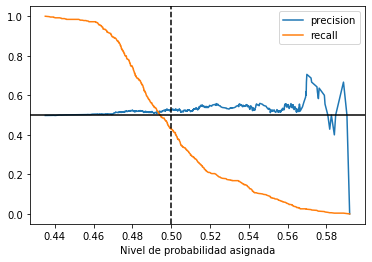

In [35]:
proba_estimate = best_model.predict_proba(Xtest)[:, 1]
prec, recall, threshold = precision_recall_curve(ytest, proba_estimate)

plt.plot(threshold, prec[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()
plt.axvline(x=0.5, linestyle="--", c="black")
plt.axhline(y=0.5, linestyle="-", c="black")
plt.xlabel("Nivel de probabilidad asignada")